## Perform sentimental analysis:

#### 1) Extract reviews of any product from ecommerce website like amazon


#### 2) Perform emotion mining

In [6]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 187.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/636.8 kB 187.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/636.8 kB 187.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/636.8 kB 187.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/636.8 kB 187.9 kB/s eta 0:00:04
     ----- ------------------------------- 92.2/636.8 kB 228.2 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 228.2 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 228.2 kB/s eta 0:00:03
     ------ ----------------------------- 122.9/636.8 kB 218.7 kB/s eta 0:00:03
     -------- --------------------------- 143.4/636.8 kB 23

In [8]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

#### Multi-page web-scraping

In [11]:
headers = {
    'authority': 'www.amazon.in',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
    'user-agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                   'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0')
}


#### Looping through multiple pages

In [12]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [13]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [14]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

#### Save results to a Dataframe, then export as CSV

In [15]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,Reviewed in India on 5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nVery good brand,5.0,Nice watch,Reviewed in India on 21 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,Reviewed in India on 3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,Reviewed in India on 15 November 2023
...,...,...,...,...
105,4.0 out of 5 stars\nSatisfaction,4.0,Premium quality,Reviewed in India on 19 September 2023
106,4.0 out of 5 stars\nBest for this price range,4.0,The media could not be loaded.\n ...,Reviewed in India on 28 September 2023
107,4.0 out of 5 stars\nNice item,4.0,The watch is really good and has a great batte...,Reviewed in India on 18 September 2023
108,5.0 out of 5 stars\nMany features according to...,5.0,Totally worth it so many features sound qualit...,Reviewed in India on 13 November 2023


In [16]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [17]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nVery good brand,5.0,Nice watch,21 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
5,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,20 November 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


In [18]:
df.to_csv("BoatSmartWatch_Review.csv")

In [19]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nVery good brand,5.0,Nice watch,21 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
...,...,...,...,...
105,4.0 out of 5 stars\nSatisfaction,4.0,Premium quality,19 September 2023
106,4.0 out of 5 stars\nBest for this price range,4.0,The media could not be loaded.\n ...,28 September 2023
107,4.0 out of 5 stars\nNice item,4.0,The watch is really good and has a great batte...,18 September 2023
108,5.0 out of 5 stars\nMany features according to...,5.0,Totally worth it so many features sound qualit...,13 November 2023


### Data Exploration

In [20]:
reviews.Rating.describe()

count    110.000000
mean       3.909091
std        0.550987
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [21]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       107 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [22]:
reviews.isna().sum()

Title          0
Rating         0
Review         3
Review_Date    0
dtype: int64

In [23]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nVery good brand,5.0,Nice watch,21 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023


### Data Visualization

#### Date vs Review Count

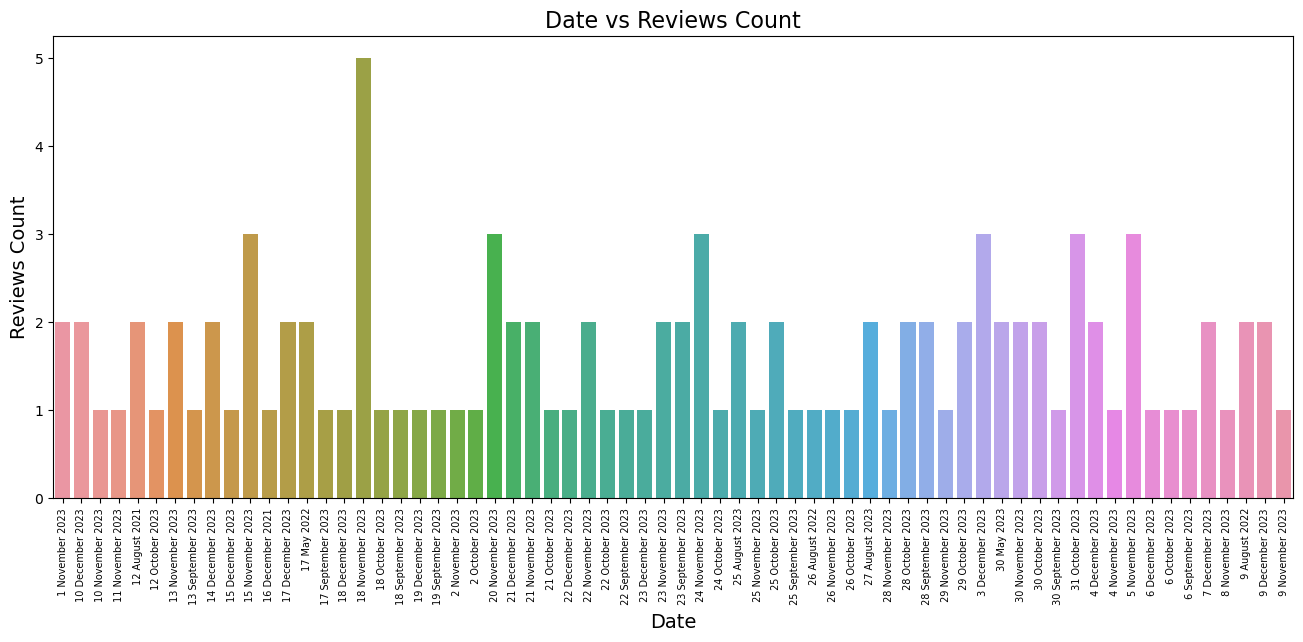

In [24]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

### Percentage of Ratings

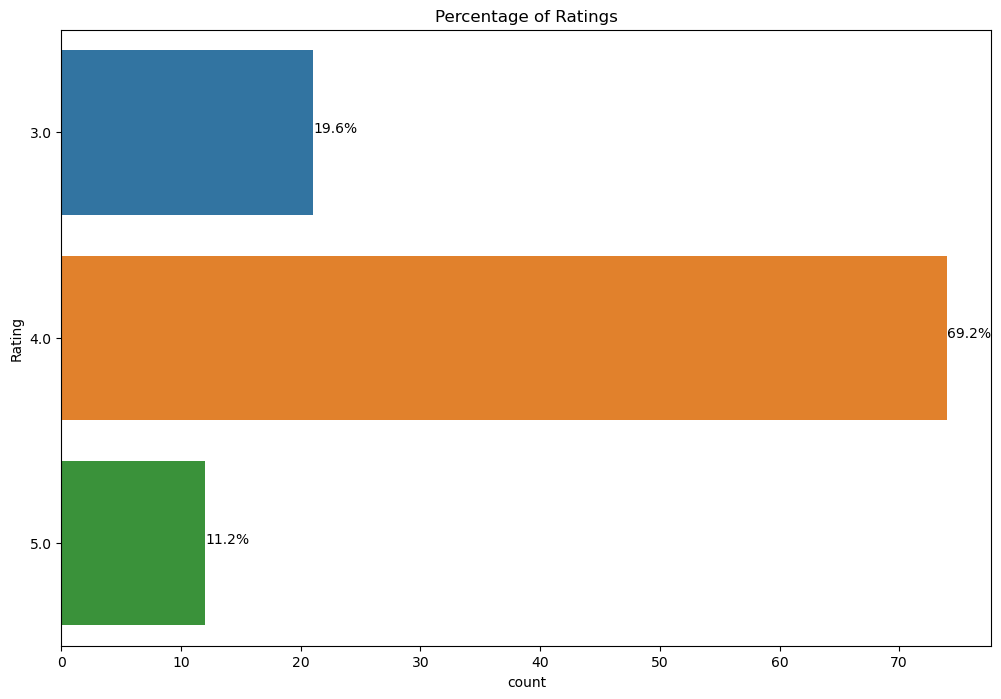

In [25]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## BasicText Preprocessing for Sentiment Analysis

#### Spelling Correction

In [26]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Gros:Took and Feel:His feels and looks very pr...
1    His smart (model Coat extend plus) watch is sa...
2                                           Vice watch
3    The watch was amazing. Ought it at July 2022 o...
4    1. Good for Bluetooth calling but very difficu...
Name: Review, dtype: object

In [27]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Pros:Look and Feel:This feels and looks very p...
1,This smart (model Boat extend plus) watch is f...
2,Nice watch
3,The watch was amazing. Bought it at July 2022 ...
4,1. Good for Bluetooth calling but very difficu...
...,...
105,Premium quality
106,The media could not be loaded.\n ...
107,The watch is really good and has a great batte...
108,Totally worth it so many features sound qualit...


#### Resetting index

In [28]:
boat_review.reset_index(drop=True, inplace=True)

In [33]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R128\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


#### Lemmatizer

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R128\AppData\Roaming\nltk_data...


True

In [39]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/107 [00:00<?, ?it/s]

In [40]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...


#### Text Pre-processing Techniques

##### Removing '@names'

In [41]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [42]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,worst watch worst service application got hang...,worst watch . worst service. application got h...
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


#### Removing links (http | https)

In [43]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,worst watch worst service application got hang...,worst watch . worst service. application got h...
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


#### Removing Review with empty text

In [44]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,worst watch worst service application got hang...,worst watch . worst service. application got h...
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


#### Dropping duplicate rows

In [45]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)



,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,worst watch worst service application got hang...,worst watch . worst service. application got h...
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


#### Function to remove emoji

In [46]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [47]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,worst watch worst service application got hang...,worst watch . worst service. application got h...
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


#### Removing Stop words

In [51]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    top = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [52]:
top.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [53]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
2,nice watch,nice watch
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,worst watch worst service application got hang...,worst watch . worst service. application got h...
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


#### Tokenize 'Clean_Reviews'

In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\R128\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [56]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [57]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [pro, look, feel, feel, look, premium, strap, ...
1    [smart, model, boat, extend, plus, watch, func...
2                                        [nice, watch]
3    [watch, amazing, bought, july, birthday, sold,...
4    [good, bluetooth, calling, difficult, use, blu...
5    [worst, watch, worst, service, application, go...
6    [medium, could, loaded, used, watch, month, bo...
7    [experience, boat, xtend, call, plus, smart, w...
8    [review, overviewaverage, boat, today, launche...
9    [skipping, part, mostly, covered, review, spon...
Name: Clean_Reviews, dtype: object

In [58]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap...","[pro, look, feel, feel, look, premium, strap, ..."
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...,"[smart, model, boat, extend, plus, watch, func..."
2,nice watch,nice watch,"[nice, watch]"
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...,"[watch, amazing, bought, july, birthday, sold,..."
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
5,worst watch worst service application got hang...,worst watch . worst service. application got h...,"[worst, watch, worst, service, application, go..."
6,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo..."
7,experience boat xtend call plus smart watch so...,experience boat xtend call plus smart watch so...,"[experience, boat, xtend, call, plus, smart, w..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."


#### Converting words to Stemmer

In [59]:
stemmer = SnowballStemmer("english")

In [60]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,pro look feel feel look premium strap qualiti ...
1,smart model boat extend plus watch function we...
2,nice watch
3,watch amaz bought juli birthday sold nov good ...
4,good bluetooth call difficult use bluetooth ea...
...,...
102,premium qualiti
103,medium could load awesom
104,watch realli good great batteri life
105,total worth mani featur sound qualiti good acc...


#### Converting words to Lemma

In [61]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy


,stemmed
0,pro look feel feel look premium strap quality ...
1,smart model boat extend plus watch functioning...
2,nice watch
3,watch amazing bought july birthday sold nov go...
4,good bluetooth calling difficult use bluetooth...
...,...
102,premium quality
103,medium could loaded awesome
104,watch really good great battery life
105,totally worth many feature sound quality good ...


### Basic Feature Extaction

#### Applying bag of Words without N grams

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [73]:
print(cv.get_feature_names_out()[109:200])

['basically' 'bathing' 'battery' 'beautiful' 'bed' 'beginning' 'believe'
 'belt' 'beneficial' 'benefitsnow' 'best' 'better' 'beyond' 'bezel' 'bhi'
 'big' 'bigger' 'bike' 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood'
 'bluetooth' 'boat' 'body' 'bother' 'bought' 'box' 'bp' 'brand' 'break'
 'breath' 'breathing' 'bright' 'brightness' 'brings' 'broken' 'browsing'
 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn'
 'burnt' 'bus' 'button' 'buy' 'buyer' 'buying' 'cable' 'cache'
 'calculated' 'calculating' 'calculation' 'calculator' 'calender' 'call'
 'called' 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'camera'
 'cannot' 'capability' 'carddesign' 'care' 'case' 'casual' 'category'
 'catering' 'caused' 'center' 'centerbefore' 'certain' 'chahiye' 'change'
 'changed' 'changer' 'charge' 'charger' 'charging' 'charm']


In [76]:
print(cv.get_feature_names_out()[:100])

['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accessibility' 'accidentally' 'according' 'account'
 'accuracy' 'accuracybatteryyou' 'accuracycomparing' 'accurate'
 'accurately' 'ach' 'ackward' 'activate' 'activating' 'active' 'activites'
 'activity' 'actual' 'actually' 'adapter' 'add' 'added' 'addition'
 'adjust' 'advance' 'advanced' 'advertised' 'aggregate' 'alarm' 'alert'
 'alexa' 'allow' 'allowed' 'allowing' 'allows' 'almost' 'along' 'alright'
 'also' 'alternative' 'aluminium' 'always' 'amaze' 'amazfit' 'amazing'
 'amazon' 'amoled' 'amount' 'analog' 'android' 'angle' 'animal'
 'animation' 'anniversary' 'another' 'answer' 'anyone' 'anyonefor'
 'anything' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'application'
 'appreciate' 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside' 'asks'
 'aspect' 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'a

In [77]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [78]:
dataframe = dataframe.reset_index(drop=True)

In [79]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [80]:
corpus[3]

'watch amaz bought juli birthday sold nov good watch miss watch special best display featur mark'

### Applying Countvectorizer (Creating the Bag of Words model)

In [81]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [82]:
X.shape

(106, 1546)

In [85]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'advanc', 'alarm',
       'alarm set', 'alert', 'alexa', 'alexa support', 'alexa watch'],
      dtype=object)

In [86]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [88]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,activ step,...,would recommend go,wrist,xtend,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,youtub,yt one
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Vectorizer

In [89]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [90]:
corpus[4]

'good bluetooth call difficult use bluetooth earbud everytim one choos speaker phone want call notif watch default call possibl spo constant featur one go phone menu click get heart rate monitor alway set frequenc heart rate monitor min regard notif avail app googl calend gmail outlook whatsapp twitter linkedin yahoo youtub suffici infact disabl whatsapp distract sm otp shown watch good help screen bright good outdoor indoor use watch vibrat good use prompt watch face plenti collect beauti band fit good daili use take take watch bluetooth callin featur requir els take non bluetooth call featur face peculiar problem whenev turn alway display watch screen suddenli turn well connect phone display medium play call heard watch could turn restart reset use continu discharg complet charg watch display come howev problem appear'

### Applying TF-IDF Vectorizer

In [91]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [92]:
X.shape

(106, 1546)

In [94]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'advanc', 'alarm',
       'alarm set', 'alert', 'alexa', 'alexa support', 'alexa watch'],
      dtype=object)

In [95]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [97]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,activ step,...,would recommend go,wrist,xtend,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,youtub,yt one
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.066906,0.0
1,0.0,0.036895,0.0,0.0,0.0,0.0,0.0,0.032992,0.0,0.043135,...,0.0,0.039563,0.0,0.0,0.0,0.0,0.0,0.071554,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.069292,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
102,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
103,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
104,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


#### Named Entity Recognition (NER)

In [98]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'pro look feel feel look premium strap quality good price range seems pretty comfortable wear long hour display big inch hd display price range amoled display would better show pretty good deeper black feel like amoled display fitness tracking youtubers suggested boat brand fitness tracking budget played walking running jogging suitable budget r battery life good battery life mah battery day battery claim day day casual usage heavily use fitness tracking bt calling get battery life day good verdict good smartwatch good display good fitness tracking budget rsmy rating smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement al

#### Parts Of Speech (POS) Tagging

In [101]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.0/12.8 MB 219.4 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 219.4 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 204.8 kB/s eta 0:01:03
     --------------------------------------- 0.1/12.8 MB 204.8 kB/s eta 0:01:03
     --------------------------------------- 0.1/12.8 MB 229.7 kB/s eta 0:00:56
     --------------------------------------- 0.1/12.8 MB 218.5 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 242.7 kB/s eta 0:00:53
     --------------------------------------- 0.1/12.8 MB 232.7 k

In [102]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [103]:
for token in doc_block[:50]:
    print(token,token.pos_)

pro ADJ
look NOUN
feel VERB
feel VERB
look VERB
premium ADJ
strap NOUN
quality NOUN
good ADJ
price NOUN
range NOUN
seems VERB
pretty ADV
comfortable ADJ
wear VERB
long ADJ
hour NOUN
display NOUN
big ADJ
inch NOUN
hd VERB
display NOUN
price NOUN
range NOUN
amoled VERB
display NOUN
would AUX
better ADV
show VERB
pretty ADV
good ADJ
deeper ADJ
black ADJ
feel NOUN
like ADP
amoled VERB
display NOUN
fitness NOUN
tracking NOUN
youtubers NOUN
suggested VERB
boat NOUN
brand NOUN
fitness NOUN
tracking NOUN
budget NOUN
played VERB
walking VERB
running VERB
jogging VERB


#### Filtering the nouns and verbs only

In [104]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['sleep', 'woke', 'neaarer', 'instrument', 'heart', 'rate', 'measurement', 'instrument', 'stress', 'reflecting', 'condition', 'activity', 'step', 'showing', 'distance', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'checked', 'feature', 'water', 'water', 'checked', 'bathing', 'drizzle', 'rain', 'time', 'display', 'number', 'display', 'cloud', 'feature', 'working', 'model', 'feature', 'skin', 'made', 'display', 'wrist', 'put', 'rest', 'raise', 'feature', 'feature', 'enabled', 'calling', 'feature', 'speaker', 'call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'r

#### Counting the noun & verb tokens

In [105]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,200
1,boat,92
2,feature,81
3,day,62
4,display,61
5,time,60
6,smartwatch,53
7,xtend,46
8,battery,45
9,use,41


#### Visualizing results (Barchart for top 10 nouns + verbs)

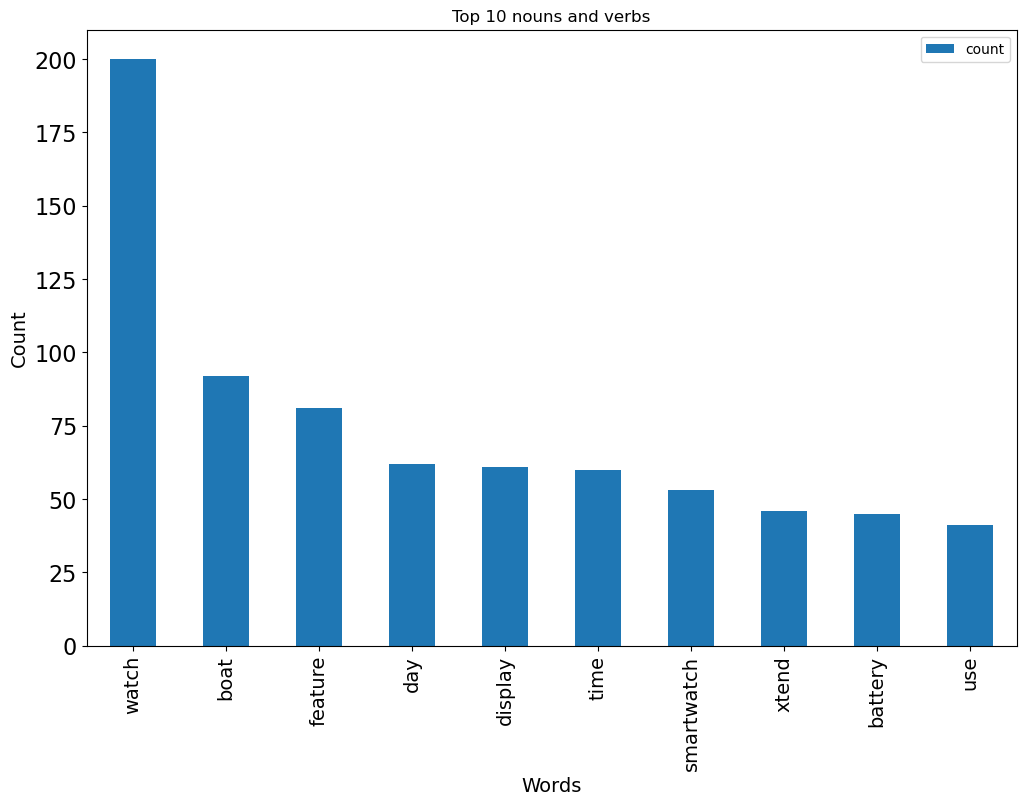

In [106]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


#### Feature Extraction

##### BOW Features

In [107]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

##### TF-IDF Features

In [108]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#### Fetch sentiments Using TextBlob

In [109]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [110]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,99
neg,7


#### Let's calculate subjectivity and Polarity

In [111]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap...","[pro, look, feel, feel, look, premium, strap, ...",0.620588,0.349020
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,nice watch,nice watch,"[nice, watch]",1.000000,0.600000
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...,"[watch, amazing, bought, july, birthday, sold,...",0.600000,0.766667
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu...",0.555556,0.303333


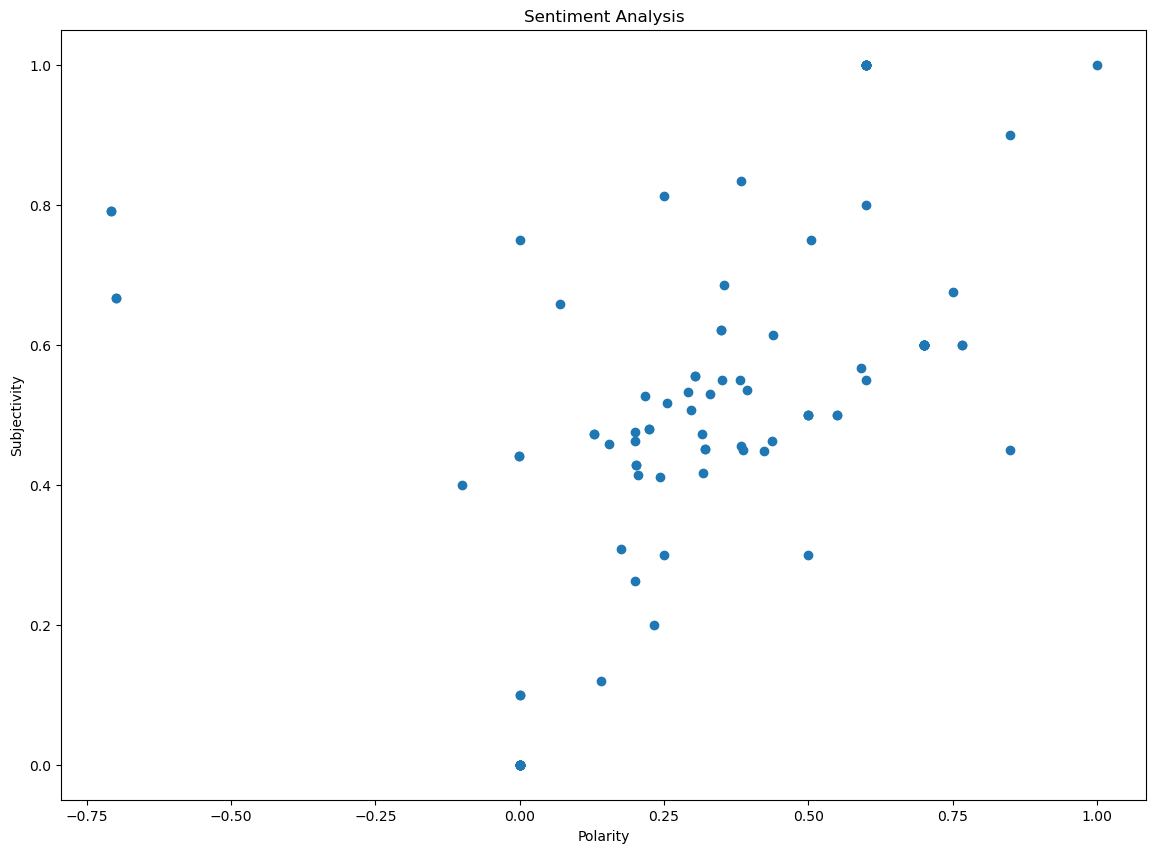

In [112]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [113]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap...","[pro, look, feel, feel, look, premium, strap, ...",0.620588,0.349020,pos
1,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,nice watch,nice watch,"[nice, watch]",1.000000,0.600000,pos
3,watch amazing bought july birthday sold nov go...,watch amazing. bought july 2022 birthday. sold...,"[watch, amazing, bought, july, birthday, sold,...",0.600000,0.766667,pos
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu...",0.555556,0.303333,pos


#### Story Generation and Visualization

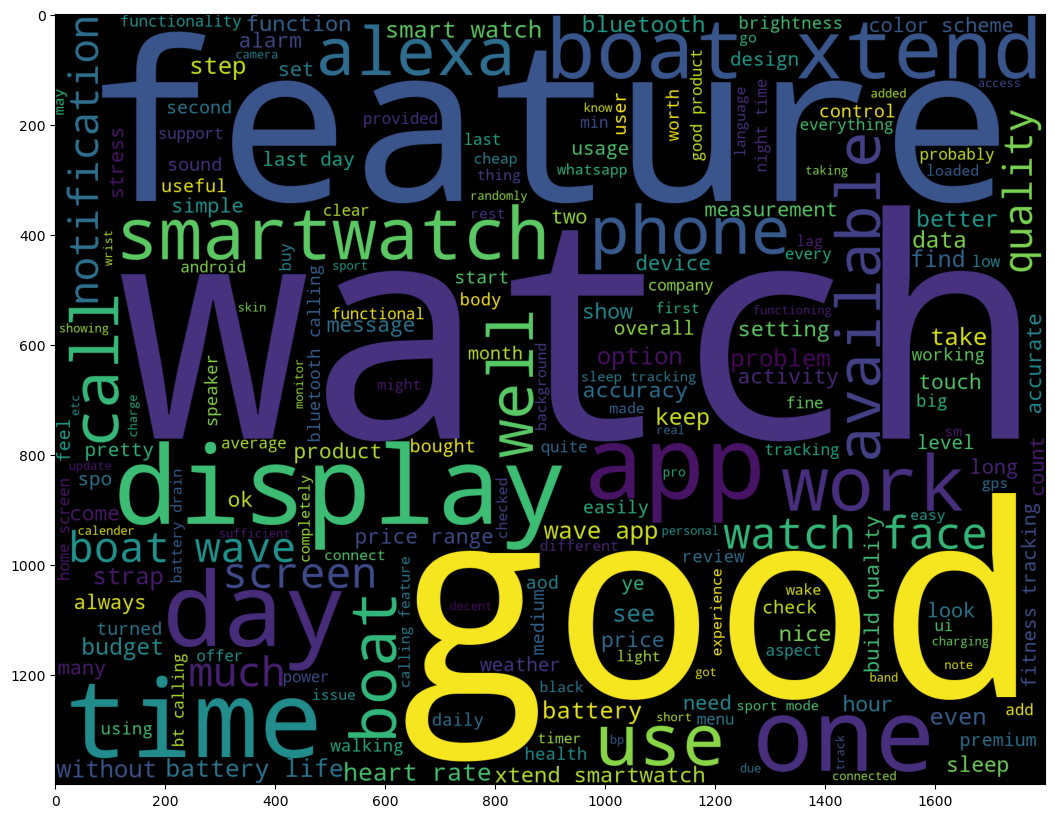

In [114]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

#### Most common words in positive Review

In [115]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

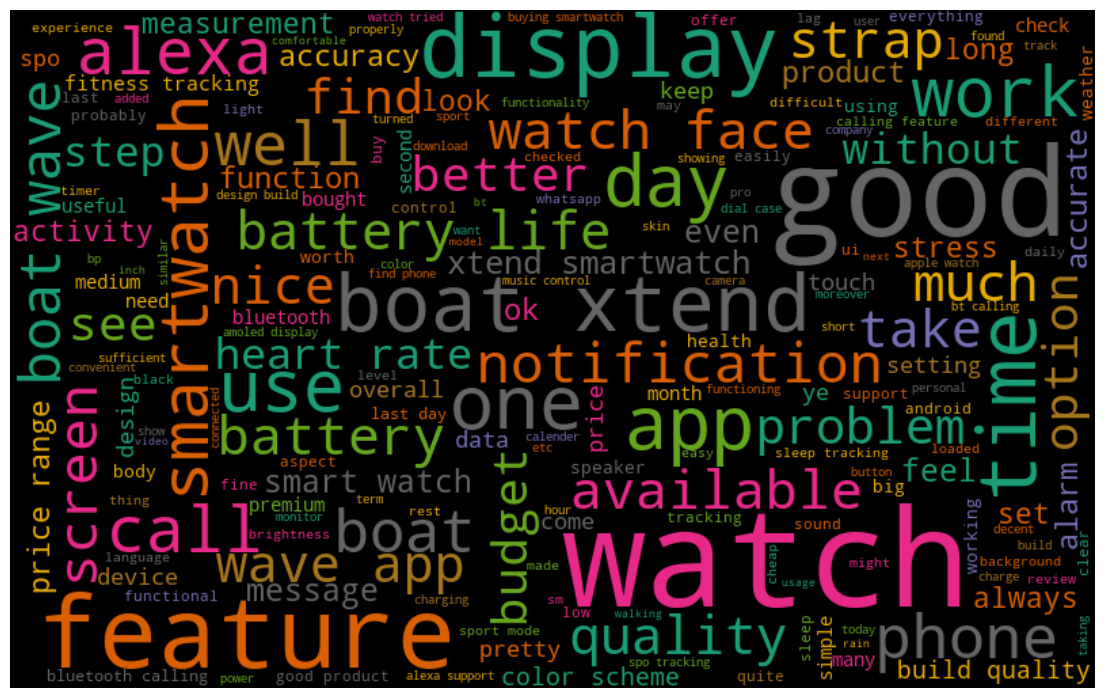

In [116]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

#### Most common words in negative Review

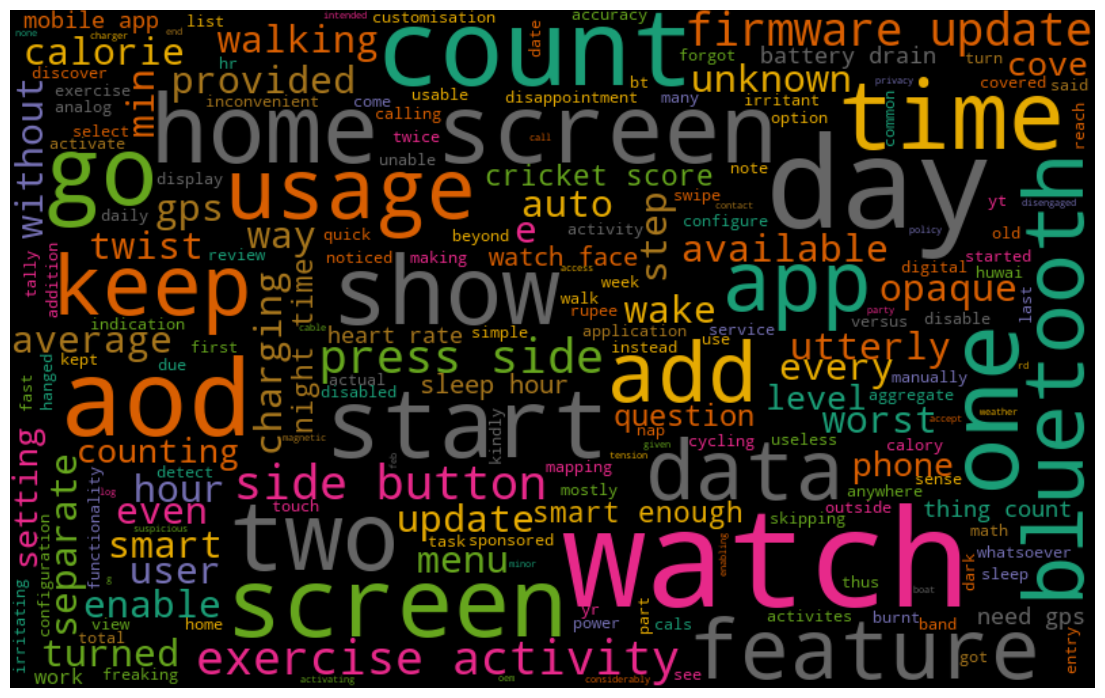

In [117]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)